# Student Survey Analysis

### Author: Ahmad Arrabi

This work presents a simple analysis of a survey on online learning. Our aim is to be comfortable coding with python and to use it as a tool to gain insight, visualize, and interpret our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Make sure your data is in csv format. In this case, we converted from '.xlsx' to '.csv'

In [2]:
survey = pd.read_csv('students_survey.csv')

## Dataset Overview

In [3]:
survey.head(8)

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes
0,8-31-2020 10:24:49,Male,Off (Other reason),On (To answer Teacher),Laptop,"Eye Strain, Headache",Yes,Black board teaching,Yes,Offline classes,NaN
1,8-31-2020 17:39:42,Male,Off (No webcam available),On (To answer Teacher),Computer,Eye Strain,Yes,Presentations (ppt),Yes,Online classes,"Good Teaching , But It can be improved"
2,8-31-2020 17:40:39,Male,On (When teacher asks),On (To answer Teacher),Laptop,"Eye Strain, Back pain, Headache",Yes,Black board teaching,No,Offline classes,I would prefer offline classes
3,8-31-2020 17:43:43,Male,On (All the time),On (To answer Teacher),Computer,"Eye Strain, Back pain",Yes,Presentations (ppt),Yes,Offline classes,NaN
4,8-31-2020 17:44:06,Female,On (When teacher asks),On (To answer Teacher),"Phone, Laptop","Eye Strain, Back pain, Headache",No,Black board teaching,No,Offline classes,NaN
5,8-31-2020 17:44:33,Male,On (When teacher asks),On (To answer Teacher),Laptop,Headache,Yes,Presentations (ppt),No,Offline classes,NaN
6,8-31-2020 17:46:44,Female,On (When teacher asks),On (To answer Teacher),"Phone, Tab, Laptop, Computer","Eye Strain, Back pain, Headache",Yes,Black board teaching,Yes,Offline classes,NaN
7,8-31-2020 17:47:08,Male,On (All the time),On (To answer Teacher),Tab,Back pain,No,Black board teaching,No,Online classes,NaN


In [4]:
survey.shape

(746, 11)

In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Timestamp                                                                                        746 non-null    object
 1   Gender                                                                                           746 non-null    object
 2   Webcam status during class                                                                       746 non-null    object
 3   Mic status during class                                                                          746 non-null    object
 4   Which device do you use for online classes?                                                      746 non-null    object
 5   Did you face an

In [6]:
survey.describe()

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes
count,746,746,746,746,746,746,746,746,746,746,247
unique,733,2,6,5,15,35,2,2,2,2,183
top,8-31-2020 18:33:17,Female,On (When teacher asks),On (To answer Teacher),Laptop,No Issue,No,Black board teaching,No,Offline classes,Good
freq,2,384,366,493,323,87,390,515,435,585,17


By using the describe function, we can know the most frequent answer for each question. It is apparent that students were not satisfied with online teaching.

## Analyzing answers

#### Activity in class

Let's first take a look at how much do students interact in class (webcam/mic)

In [7]:
survey['Webcam status during class'].value_counts()

On (When teacher asks)       366
On (All the time)            124
Off (Other reason)            89
Off (Shy to switch on)        57
Off (No webcam available)     56
Off (Untidy appearance)       54
Name: Webcam status during class, dtype: int64

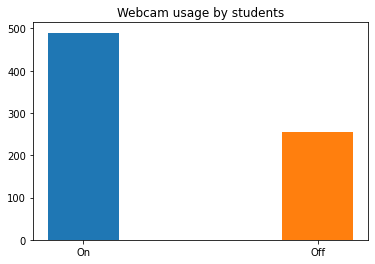

In [162]:
webcam_on = survey.loc[survey['Webcam status during class'].str.startswith('On')]
webcam_off = survey.loc[survey['Webcam status during class'].str.startswith('Off')]

webcam_on.loc[:,('Webcam status during class')] = 'On'

webcam_off.loc[:,('Webcam status during class')] = 'Off'

plt.bar(x = webcam_on['Webcam status during class'], height = len(webcam_on), width = 0.3, align='center')
plt.bar(x = webcam_off['Webcam status during class'], height = len(webcam_off), width = 0.3, align='center')

plt.title('Webcam usage by students')
plt.show()

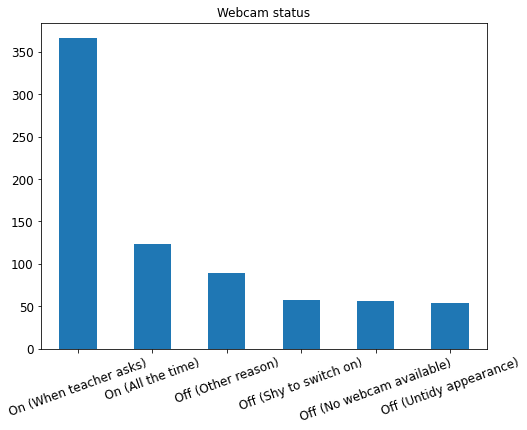

In [160]:
survey['Webcam status during class'].value_counts().plot(kind = 'bar', figsize = (8,6), fontsize=12)
plt.xticks(rotation =20)
plt.title('Webcam status')
plt.show()

In [10]:
survey['Mic status during class'].value_counts()

On (To answer Teacher)        493
Always On                      88
Off (Do not want to reply)     63
Off (Other reason)             58
Off (No mic available)         44
Name: Mic status during class, dtype: int64

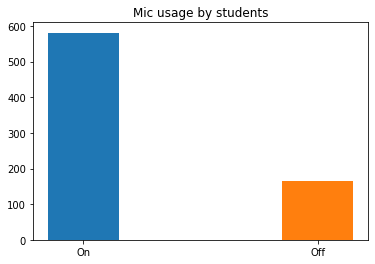

In [11]:
mic_on = survey.loc[survey['Mic status during class'].str.startswith('On') |
                    survey['Mic status during class'].str.startswith('Always')]

mic_off = survey.loc[survey['Mic status during class'].str.startswith('Off')]

mic_on.loc[:,('Mic status during class')] = 'On'
mic_off.loc[:,('Mic status during class')] = 'Off'

plt.bar(x = mic_on['Mic status during class'], height = len(mic_on), width = 0.3, align='center')
plt.bar(x = mic_off['Mic status during class'], height = len(mic_off), width = 0.3, align='center')

plt.title('Mic usage by students')
plt.show()

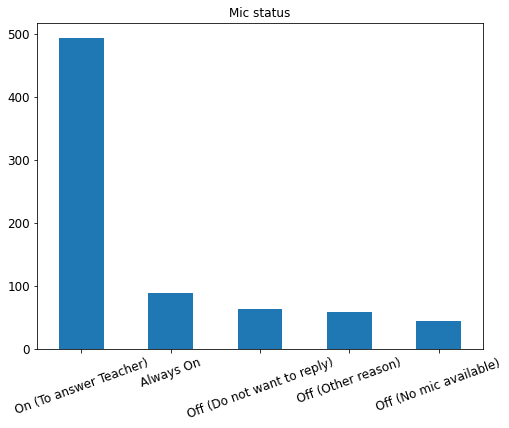

In [172]:
survey['Mic status during class'].value_counts().plot(kind='bar', figsize = (8, 6), fontsize = 12)
plt.xticks(rotation =20)
plt.title('Mic status')
plt.show()

Now we want to determine students' overall interaction in classes, which can be defined as students who have either the mic or the webcam enabled.

We didn't change the index so if we joined datasets on index, and filtered out students with both webcam and mic on, then we'll get interactive students.

In [13]:
mic_on = mic_on.filter(['Mic status during class'])
mic_off = mic_off.filter(['Mic status during class'])
webcam_on = webcam_on.filter(['Webcam status during class'])
webcam_off = webcam_off.filter(['Webcam status during class'])

In [14]:
interactive_students = webcam_on.join(mic_on, how = 'outer')

lazy_students = webcam_off.join(mic_off, how = 'outer')

Notice that outer joins lead to null values, so we have to deal with that !

In [15]:
interactive_students.fillna('NULL', inplace = True)
lazy_students.fillna('NULL', inplace = True)

interactive_students = interactive_students.loc[(interactive_students['Mic status during class'] == 'On') |
                        (interactive_students['Webcam status during class'] == 'On')]

lazy_students = lazy_students.loc[(lazy_students['Mic status during class'] == 'Off') &
                        (lazy_students['Webcam status during class'] == 'Off')]

interactive_students['active'] = True

lazy_students['active'] = False

interactive_students = interactive_students.filter(['active'])

lazy_students = lazy_students.filter(['active'])

In [16]:
survey = survey.join(interactive_students)
survey['active'].fillna(False, inplace = True)

In [17]:
survey['active'].value_counts(normalize = True)

True     0.831099
False    0.168901
Name: active, dtype: float64

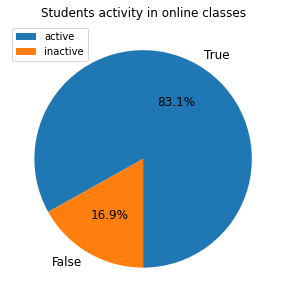

In [18]:
survey['active'].value_counts(normalize = True).plot(figsize = (5,5), kind = 'pie', ylabel = '', autopct='%1.1f%%', startangle=270, fontsize=12, title = 'Students activity in online classes')
plt.legend(['active','inactive'], loc = 'upper left')
plt.show()

#### Device used to attend class

Let's analyze another answer, which is Which device do you use for online classes?

In [19]:
survey['Which device do you use for online classes?'].value_counts()

Laptop                          323
Phone                           166
Phone, Laptop                   105
Computer                         40
Tab                              35
Phone, Tab, Laptop, Computer     15
Tab, Laptop                      14
Phone, Tab, Laptop               12
Phone, Tab                       10
Laptop, Computer                 10
Phone, Laptop, Computer           8
Phone, Computer                   3
Tab, Computer                     2
Tab, Laptop, Computer             2
Phone, Tab, Computer              1
Name: Which device do you use for online classes?, dtype: int64

Notice that there are multiple devices in one string

In [20]:
lazy_students_devices = survey.loc[survey['active'] == False]['Which device do you use for online classes?'].str.split(',', expand = True)

In [21]:
lazy_students_devices.stack().str.lstrip().value_counts()

Laptop      61
Phone       59
Computer    27
Tab         22
dtype: int64

In [22]:
active_students_devices = survey.loc[survey['active'] == True]['Which device do you use for online classes?'].str.split(',', expand=True)

In [23]:
active_students_devices.stack().str.lstrip().value_counts()

Laptop      428
Phone       261
Tab          69
Computer     54
dtype: int64

#### Issues  faced in online learning

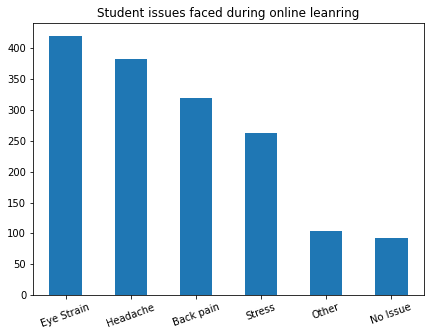

In [24]:
survey['Did you face any of the following issues after the initiation of online classes?'].str.split(', ', expand=True).stack().value_counts().plot(kind = 'bar', figsize=(7,5))
plt.xticks(rotation = 20)
plt.title('Student issues faced during online leanring')
plt.show()

Most students faced issues during online learning, with only some (below 100) faced none.

Let's try to invistigate possible reasons behind these issues. 

In [46]:
stressed_students = survey.loc[survey['Did you face any of the following issues after the initiation of online classes?'].str.contains('Stress')]

stressed_students['Are you able to understand the concepts through online classes?'].value_counts()

No     161
Yes    101
Name: Are you able to understand the concepts through online classes?, dtype: int64

It looks like students that do not understand online classes, get stressed over it.

Let's look at the students the faced no issues. 

It seems that their studying environment was friendly and all necessiry factors were there. They have access to a webcam and a mic, understand online classes, intreseted in online classes. 

In [65]:
no_issue_students = survey.loc[survey['Did you face any of the following issues after the initiation of online classes?'] == 'No Issue']

In [68]:
no_issue_students.describe()

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes,active
count,87,87,87,87,87,87,87,87,87,87,32,87
unique,87,2,6,5,11,1,2,2,2,2,25,2
top,9-1-2020 11:54:33,Male,On (When teacher asks),On (To answer Teacher),Laptop,No Issue,Yes,Presentations (ppt),Yes,Offline classes,Good,True
freq,1,55,39,64,31,87,73,52,65,46,3,77


#### Understand concepts

Over 50% of srudents do not understand concept through online classes

In [82]:
survey['Are you able to understand the concepts through online classes?'].value_counts(normalize = True)

No     0.522788
Yes    0.477212
Name: Are you able to understand the concepts through online classes?, dtype: float64

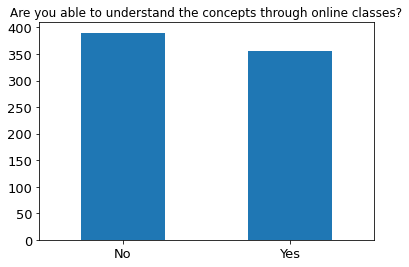

In [165]:
survey['Are you able to understand the concepts through online classes?'].value_counts().plot(kind = 'bar', fontsize = 13)
plt.xticks(rotation = 0)
plt.title('Are you able to understand the concepts through online classes?')
plt.show()

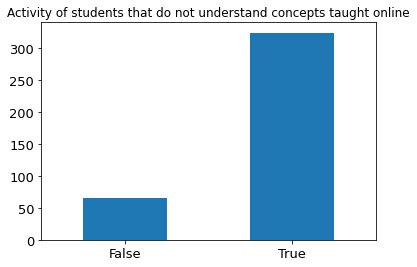

In [166]:
did_not_understand = survey.loc[survey['Are you able to understand the concepts through online classes?'] == 'No']
did_not_understand['active'].value_counts().plot(kind = 'bar', fontsize=13)
plt.xticks(rotation = 0)
plt.title('Activity of students that do not understand concepts taught online')
plt.show()

It seems like even if students are active, they still do not understand the concepts taught.

#### Preferred Teaching Method

In [99]:
survey['Which teaching methodology do you prefer?'].value_counts()

Black board teaching    515
Presentations (ppt)     231
Name: Which teaching methodology do you prefer?, dtype: int64

#### Interest in Online Classes

In [126]:
survey['Are you interested in attending online classes?'].value_counts()

No     435
Yes    311
Name: Are you interested in attending online classes?, dtype: int64

In [139]:
odd_students = survey.loc[(survey['Are you able to understand the concepts through online classes?'] == 'Yes') &
                          (survey['Did you face any of the following issues after the initiation of online classes?'] == 'No Issue') &
                          (survey['Which teaching methodology do you prefer?'] == 'Black board teaching') &     
                          (survey['Are you interested in attending online classes?'] == 'No')]

In [140]:
print(odd_students.shape)

(9, 12)


In [142]:
odd_students['Comments on online classes'].value_counts()

Offline line classes are more better than the online classes                                                                                                                                                                                                                                          1
Offline teaching has a better interactivity with the lecturers as well as with the students for a better experience of learning in my opinion. Online platforms as of right now aren?t that great for a better combined learning experience. It feels more like a presenter and audience scenario.    1
Name: Comments on online classes, dtype: int64

#### Online vs Offline classes

In [143]:
survey.head(1)

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes,active
0,8-31-2020 10:24:49,Male,Off (Other reason),On (To answer Teacher),Laptop,"Eye Strain, Headache",Yes,Black board teaching,Yes,Offline classes,NaN,True


In [146]:
survey['If you are given a choice between online classes and offline classes which one will you choose?'].value_counts()

Offline classes    585
Online classes     161
Name: If you are given a choice between online classes and offline classes which one will you choose?, dtype: int64

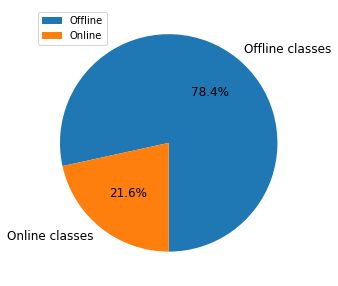

In [150]:
survey['If you are given a choice between online classes and offline classes which one will you choose?'].value_counts(normalize = True).plot(figsize = (5,5), kind = 'pie', ylabel = '', autopct='%1.1f%%', startangle=270, fontsize=12)
plt.legend(['Offline','Online'], loc = 'upper left')
plt.show()

Most students prefer offline classes

In [169]:
online_students = survey.loc[survey['If you are given a choice between online classes and offline classes which one will you choose?'] == 'Online classes']

In [170]:
online_students.describe()

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes,active
count,161,161,161,161,161,161,161,161,161,161,65,161
unique,161,2,6,5,13,25,2,2,2,1,35,2
top,8-31-2020 18:03:18,Male,On (When teacher asks),On (To answer Teacher),Laptop,No Issue,Yes,Presentations (ppt),Yes,Online classes,Good,True
freq,1,101,60,90,54,41,132,100,138,161,12,128


The survey answers of students that preferred online classes are kind of identical to those who faced no issues (presented in earlier sections)

In [177]:
online_students.loc[online_students['active'] == False]

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes,active
178,8-31-2020 18:40:01,Male,Off (No webcam available),Off (No mic available),Computer,"Eye Strain, Headache",Yes,Presentations (ppt),Yes,Online classes,We can't continuously listen to class in onlin...,False
213,8-31-2020 18:58:46,Male,Off (Other reason),Off (Other reason),Phone,"Eye Strain, Back pain, Headache",Yes,Presentations (ppt),Yes,Online classes,n,False
252,8-31-2020 19:43:11,Male,Off (No webcam available),Off (Other reason),Phone,"Eye Strain, Headache",No,Black board teaching,No,Online classes,NaN,False
269,8-31-2020 19:54:42,Female,Off (Other reason),Off (No mic available),Laptop,"Eye Strain, Back pain, Headache, Stress",Yes,Black board teaching,Yes,Online classes,Good,False
293,8-31-2020 20:36:45,Male,Off (Other reason),Off (Other reason),Laptop,"Eye Strain, Back pain, Headache, Stress, Other",Yes,Presentations (ppt),Yes,Online classes,NaN,False
359,9-1-2020 10:02:22,Male,Off (No webcam available),Off (No mic available),Computer,"Eye Strain, Back pain, Headache, Stress",Yes,Presentations (ppt),Yes,Online classes,NaN,False
370,9-1-2020 11:54:33,Male,Off (Other reason),Off (Other reason),Phone,No Issue,Yes,Presentations (ppt),Yes,Online classes,As per the schedule given to every student in ...,False
372,9-1-2020 12:45:42,Male,Off (No webcam available),Off (Do not want to reply),"Phone, Laptop","Eye Strain, Back pain, Headache, Stress",No,Black board teaching,Yes,Online classes,NaN,False
402,9-2-2020 13:50:27,Female,Off (Shy to switch on),Off (Do not want to reply),Tab,"Back pain, Stress, Other",Yes,Presentations (ppt),Yes,Online classes,None,False
405,9-2-2020 13:51:37,Male,Off (Shy to switch on),Off (Do not want to reply),Tab,"Eye Strain, Back pain, Headache",Yes,Presentations (ppt),Yes,Online classes,None,False


Some weird samples !

In [181]:
online_students.loc[(online_students['active'] == False)&
                    (online_students['Are you interested in attending online classes?'] == 'No')]

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes,active
252,8-31-2020 19:43:11,Male,Off (No webcam available),Off (Other reason),Phone,"Eye Strain, Headache",No,Black board teaching,No,Online classes,NaN,False
427,9-2-2020 20:40:36,Male,Off (Untidy appearance),Off (Other reason),Computer,No Issue,Yes,Presentations (ppt),No,Online classes,NaN,False
652,9-3-2020 14:38:59,Male,Off (Untidy appearance),Off (No mic available),"Phone, Laptop",Other,No,Presentations (ppt),No,Online classes,NaN,False
667,9-3-2020 14:42:32,Female,Off (Shy to switch on),Off (Do not want to reply),Laptop,Headache,No,Black board teaching,No,Online classes,Offline is better,False
704,9-3-2020 15:50:15,Male,Off (Untidy appearance),Off (Do not want to reply),"Phone, Tab","Eye Strain, Back pain",Yes,Black board teaching,No,Online classes,NaN,False
716,9-3-2020 19:03:59,Female,Off (Untidy appearance),Off (No mic available),"Phone, Laptop",No Issue,Yes,Black board teaching,No,Online classes,NaN,False
